In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
data_screw = pd.read_excel('data_screw.xlsx', sheet_name='Sheet1',
                           usecols=['radius', 'height', 'T_max'])
data_plate = pd.read_excel('data_plate.xlsx', sheet_name='Sheet1',
                           usecols=['length', 'width', 'height', 'T_max'])

In [3]:
scaler = MinMaxScaler()
data_screw_nor = scaler.fit_transform(data_screw)
data_plate_nor = scaler.fit_transform(data_plate)

In [4]:
X_train_screw, X_test_screw, y_train_screw, y_test_screw = train_test_split(
    data_screw_nor[:, 0:2], data_screw_nor[:,-1], test_size=0.30)

X_train_plate, X_test_plate, y_train_plate, y_test_plate = train_test_split(
    data_plate_nor[:, 0:3], data_plate_nor[:,-1], test_size=0.30)

### ANN对screw数据集进行训练

In [5]:
screw_model_ANN = Sequential()
screw_model_ANN.add(Dense(units = 2, kernel_initializer='he_normal', bias_initializer='zeros', activation='relu', input_shape=(2,)))
screw_model_ANN.add(Dense(units = 10, kernel_initializer='he_normal', bias_initializer='zeros', activation='relu'))
screw_model_ANN.add(Dense(units = 1, kernel_initializer='he_normal', bias_initializer='zeros',  activation='relu'))
# adam = Adam(lr=0.0001)
screw_model_ANN.compile(loss='mse', optimizer='adam')

In [6]:
history_screw_ANN = screw_model_ANN.fit(X_train_screw, y_train_screw, epochs=4000)

Epoch 1/4000
7/7 [==============================] - 2s 1ms/step - loss: 0.1232
Epoch 2/4000
7/7 [==============================] - 0s 1ms/step - loss: 0.1125
Epoch 3/4000
7/7 [==============================] - 0s 2ms/step - loss: 0.1045
Epoch 4/4000
7/7 [==============================] - 0s 1ms/step - loss: 0.0976
Epoch 5/4000
7/7 [==============================] - 0s 1ms/step - loss: 0.0916
Epoch 6/4000
7/7 [==============================] - 0s 1ms/step - loss: 0.0864
Epoch 7/4000
7/7 [==============================] - 0s 1ms/step - loss: 0.0821
Epoch 8/4000
7/7 [==============================] - 0s 2ms/step - loss: 0.0781
Epoch 9/4000
7/7 [==============================] - 0s 1ms/step - loss: 0.0743
Epoch 10/4000
7/7 [==============================] - 0s 1ms/step - loss: 0.0708
Epoch 11/4000
7/7 [==============================] - 0s 1ms/step - loss: 0.0677
Epoch 12/4000
7/7 [==============================] - 0s 1ms/step - loss: 0.0646
Epoch 13/4000
7/7 [==============================

In [7]:
screw_y_test_predict = screw_model_ANN.predict(X_test_screw)
screw_y_train_predict = screw_model_ANN.predict(X_train_screw)

### ANN+Cheby对screw数据集进行训练

In [8]:
def chevby_polynorm_screw(input_data): 
    height = input_data.shape[0]
    output = np.zeros((height, 5))
    output[:,0] = 1
    output[:,1] = input_data[:,1]
    output[:,2] = 2*input_data[:,1] - 1
    output[:,3] = 4*input_data[:,1]*input_data[:,1]-3*input_data[:,1]
    output[:,4] = input_data[:,0]
    return output

In [9]:
X_train_screw_chevby = chevby_polynorm_screw(X_train_screw)
X_test_screw_chevby = chevby_polynorm_screw(X_test_screw)

In [10]:
screw_model_chevby = Sequential()
screw_model_chevby.add(Dense(units = 5, kernel_initializer='he_normal', bias_initializer='zeros', activation='relu', input_shape=(5,)))
screw_model_chevby.add(Dense(units = 10, kernel_initializer='he_normal', bias_initializer='zeros', activation='relu'))
screw_model_chevby.add(Dense(units = 1, kernel_initializer='he_normal', bias_initializer='zeros', activation='relu'))
# adam = Adam(lr=0.0001)
screw_model_chevby.compile(loss='mse', optimizer='adam')

In [11]:
history_screw_Cheby = screw_model_chevby.fit(X_train_screw_chevby, y_train_screw, epochs=4000)

Epoch 1/4000
7/7 [==============================] - 0s 1ms/step - loss: 0.1784
Epoch 2/4000
7/7 [==============================] - 0s 1ms/step - loss: 0.1582
Epoch 3/4000
7/7 [==============================] - 0s 1ms/step - loss: 0.1407
Epoch 4/4000
7/7 [==============================] - 0s 1ms/step - loss: 0.1230
Epoch 5/4000
7/7 [==============================] - 0s 2ms/step - loss: 0.1039
Epoch 6/4000
7/7 [==============================] - 0s 1ms/step - loss: 0.0808
Epoch 7/4000
7/7 [==============================] - 0s 1ms/step - loss: 0.0592
Epoch 8/4000
7/7 [==============================] - 0s 1ms/step - loss: 0.0429
Epoch 9/4000
7/7 [==============================] - 0s 1ms/step - loss: 0.0323
Epoch 10/4000
7/7 [==============================] - 0s 1ms/step - loss: 0.0253
Epoch 11/4000
7/7 [==============================] - 0s 1ms/step - loss: 0.0207
Epoch 12/4000
7/7 [==============================] - 0s 1ms/step - loss: 0.0178
Epoch 13/4000
7/7 [==============================

In [12]:
screw_y_test_predict_chevby = screw_model_chevby.predict(X_test_screw_chevby)
screw_y_train_predict_chevby = screw_model_chevby.predict(X_train_screw_chevby)

### 计算评价指标

In [13]:
mse_screw_ANN = mean_squared_error(y_test_screw, screw_y_test_predict)
mae_screw_ANN = mean_absolute_error(y_test_screw, screw_y_test_predict)
mse_screw_Chevby = mean_squared_error(y_test_screw, screw_y_test_predict_chevby)
mae_screw_Chevby = mean_absolute_error(y_test_screw, screw_y_test_predict_chevby)
print(f'MSE_Screw_ANN: {mse_screw_ANN}, MAE_Screw_ANN: {mae_screw_ANN}')
print(f'MSE_Screw_Chevby: {mse_screw_Chevby}, MAE_Screw_Chevby: {mae_screw_Chevby}')

MSE_Screw_ANN: 0.016810239168075947, MAE_Screw_ANN: 0.09379912107275981
MSE_Screw_Chevby: 0.0010188619279257528, MAE_Screw_Chevby: 0.02288961962641028


### 真实vs预测图

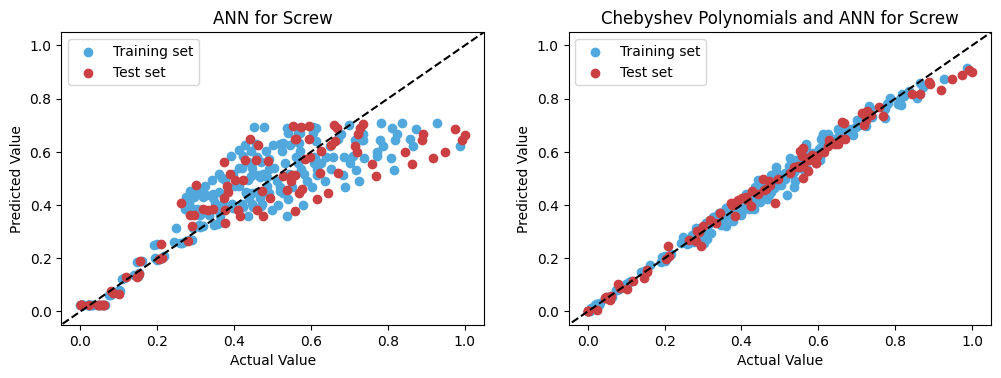

In [14]:
# color = '#51a8dd'   蓝色
# color = '#cb4042'   红色
fig = plt.figure(figsize=(12,3.8))
plt.subplot(121)
plt.scatter(y_train_screw, screw_y_train_predict, color = '#51a8dd', label = 'Training set')
plt.scatter(y_test_screw, screw_y_test_predict ,color = '#cb4042', label = 'Test set')
x = np.linspace(-1, 2, 100)
y = x
plt.plot(x, y, linestyle = '--', color='black')
plt.legend()
plt.legend()
plt.ylabel('Predicted Value')
plt.xlabel('Actual Value')
plt.title('ANN for Screw')
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.subplot(122)
plt.scatter(y_train_screw, screw_y_train_predict_chevby, color = '#51a8dd', label = 'Training set')
plt.scatter(y_test_screw, screw_y_test_predict_chevby,color = '#cb4042', label = 'Test set')
x = np.linspace(-1, 2, 100)
y = x
plt.plot(x, y, linestyle = '--', color='black')
plt.legend()
plt.ylabel('Predicted Value')
plt.xlabel('Actual Value')
plt.title('Chebyshev Polynomials and ANN for Screw')
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.savefig('1.svg', format="svg")
plt.show()

### 残差图

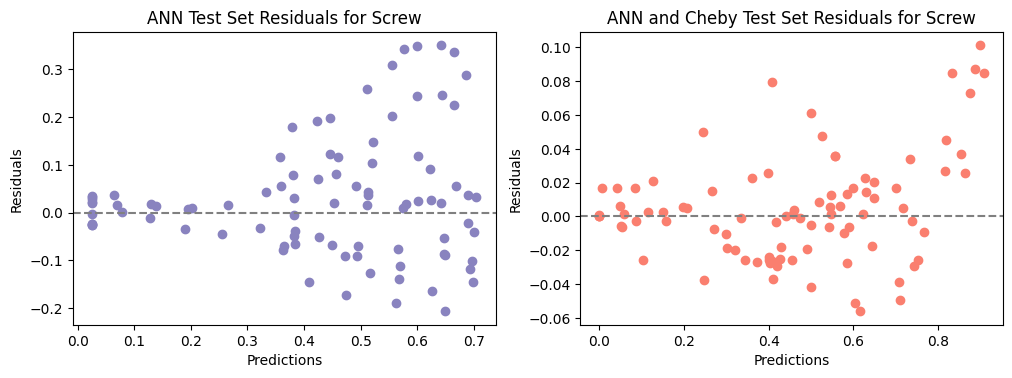

In [15]:
# 紫色 '#BEB8DC'
# 橙色 '#FA7F6F'
fig = plt.figure(figsize=(12,3.8))
plt.subplot(121)
plt.title('ANN Test Set Residuals for Screw')
screw_ANN_residuals = y_test_screw.reshape(-1,1) - screw_y_test_predict
plt.scatter(screw_y_test_predict, screw_ANN_residuals, color = '#8983BF')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.axhline(y=0, color='gray', linestyle='--')
plt.subplot(122)
plt.title('ANN and Cheby Test Set Residuals for Screw')
screw_Cheby_residuals = y_test_screw.reshape(-1,1) - screw_y_test_predict_chevby
plt.scatter(screw_y_test_predict_chevby, screw_Cheby_residuals, color = '#FA7F6F')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.axhline(y=0, color='gray', linestyle='--')
plt.savefig('2.svg', format="svg")
plt.show()

### ANN对Plate数据集进行训练

In [16]:
plate_model_ANN = Sequential()
plate_model_ANN.add(Dense(units = 3, kernel_initializer='he_normal', bias_initializer='zeros', activation='relu', input_shape=(3,)))
plate_model_ANN.add(Dense(units = 10, kernel_initializer='he_normal', bias_initializer='zeros', activation='relu'))
plate_model_ANN.add(Dense(units = 1, kernel_initializer='he_normal', bias_initializer='zeros',  activation='relu'))
# adam = Adam(lr=0.0001)
plate_model_ANN.compile(loss='mse', optimizer='adam')

In [17]:
history_plate_ANN = plate_model_ANN.fit(X_train_plate, y_train_plate, epochs=4000)

Epoch 1/4000
7/7 [==============================] - 0s 2ms/step - loss: 0.2070
Epoch 2/4000
7/7 [==============================] - 0s 2ms/step - loss: 0.1997
Epoch 3/4000
7/7 [==============================] - 0s 3ms/step - loss: 0.1911
Epoch 4/4000
7/7 [==============================] - 0s 2ms/step - loss: 0.1818
Epoch 5/4000
7/7 [==============================] - 0s 3ms/step - loss: 0.1738
Epoch 6/4000
7/7 [==============================] - 0s 3ms/step - loss: 0.1670
Epoch 7/4000
7/7 [==============================] - 0s 3ms/step - loss: 0.1611
Epoch 8/4000
7/7 [==============================] - 0s 2ms/step - loss: 0.1554
Epoch 9/4000
7/7 [==============================] - 0s 4ms/step - loss: 0.1503
Epoch 10/4000
7/7 [==============================] - 0s 2ms/step - loss: 0.1451
Epoch 11/4000
7/7 [==============================] - 0s 3ms/step - loss: 0.1407
Epoch 12/4000
7/7 [==============================] - 0s 3ms/step - loss: 0.1361
Epoch 13/4000
7/7 [==============================

In [18]:
plate_y_test_predict = plate_model_ANN.predict(X_test_plate)
plate_y_train_predict = plate_model_ANN.predict(X_train_plate)

### ANN+Cheby对Plate数据集进行训练

In [19]:
def chevby_polynorm_plate(input_data): 
    height = input_data.shape[0]
    output = np.zeros((height, 7))
    output[:,0] = 1
    output[:,1] = input_data[:,0]
    output[:,2] = 2*input_data[:,0] - 1
    output[:,3] = 4*input_data[:,0]*input_data[:,1]-3*input_data[:,1]
    output[:,4] = input_data[:,1]
    output[:,5] = 2*input_data[:,1] - 1
    output[:,6] = input_data[:,2]
    return output

In [20]:
X_train_plate_chevby = chevby_polynorm_plate(X_train_plate)
X_test_plate_chevby = chevby_polynorm_plate(X_test_plate)

In [21]:
plate_model_chevby = Sequential()
plate_model_chevby.add(Dense(units = 7, kernel_initializer='he_normal', bias_initializer='zeros', activation='relu', input_shape=(7,)))
plate_model_chevby.add(Dense(units = 10, kernel_initializer='he_normal', bias_initializer='zeros', activation='relu'))
plate_model_chevby.add(Dense(units = 1, kernel_initializer='he_normal', bias_initializer='zeros', activation='relu'))
plate_model_chevby.compile(loss='mse', optimizer='adam')

In [22]:
history_plate_Cheby = plate_model_chevby.fit(X_train_plate_chevby, y_train_plate, epochs=4000)

Epoch 1/4000
7/7 [==============================] - 0s 2ms/step - loss: 0.2438
Epoch 2/4000
7/7 [==============================] - 0s 1ms/step - loss: 0.2370
Epoch 3/4000
7/7 [==============================] - 0s 1ms/step - loss: 0.2291
Epoch 4/4000
7/7 [==============================] - 0s 1ms/step - loss: 0.2225
Epoch 5/4000
7/7 [==============================] - 0s 2ms/step - loss: 0.2149
Epoch 6/4000
7/7 [==============================] - 0s 1ms/step - loss: 0.2068
Epoch 7/4000
7/7 [==============================] - 0s 1ms/step - loss: 0.1974
Epoch 8/4000
7/7 [==============================] - 0s 2ms/step - loss: 0.1807
Epoch 9/4000
7/7 [==============================] - 0s 2ms/step - loss: 0.1596
Epoch 10/4000
7/7 [==============================] - 0s 2ms/step - loss: 0.1305
Epoch 11/4000
7/7 [==============================] - 0s 2ms/step - loss: 0.0998
Epoch 12/4000
7/7 [==============================] - 0s 2ms/step - loss: 0.0756
Epoch 13/4000
7/7 [==============================

KeyboardInterrupt: 

In [ ]:
plate_y_test_predict_chevby = plate_model_chevby.predict(X_test_plate_chevby)
plate_y_train_predict_chevby = plate_model_chevby.predict(X_train_plate_chevby)

### 计算评价指标

In [ ]:
mse_plate_ANN = mean_squared_error(y_test_plate, plate_y_test_predict)
mae_plate_ANN = mean_absolute_error(y_test_plate, plate_y_test_predict)
mse_plate_Chevby = mean_squared_error(y_test_plate, plate_y_test_predict_chevby)
mae_plate_Chevby = mean_absolute_error(y_test_plate, plate_y_test_predict_chevby)
print(f'MSE_Plate_ANN: {mse_plate_ANN}, MAE_Plate_ANN: {mae_plate_ANN}')
print(f'MSE_Plate_Chevby: {mse_plate_Chevby}, MAE_Plate_Chevby: {mae_plate_Chevby}')

MSE_Plate_ANN: 0.0020393733906292648, MAE_Plate_ANN: 0.03591674928466745
MSE_Plate_Chevby: 0.0004042840718942561, MAE_Plate_Chevby: 0.01607937933012545


### 真实vs预测图

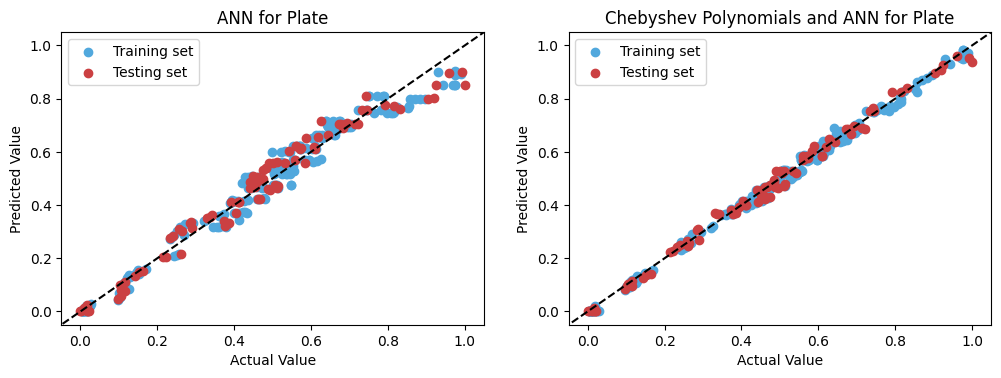

In [ ]:
# color = '#51a8dd'   蓝色
# color = '#cb4042'   红色
fig = plt.figure(figsize=(12,3.8))
plt.subplot(121)
plt.scatter(y_train_plate, plate_y_train_predict, color = '#51a8dd', label = 'Training set')
plt.scatter(y_test_plate, plate_y_test_predict ,color = '#cb4042', label = 'Testing set')
x = np.linspace(-1, 2, 100)
y = x
plt.plot(x, y, linestyle = '--', color='black')
plt.legend()
plt.ylabel('Predicted Value')
plt.xlabel('Actual Value')
plt.title('ANN for Plate')
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.subplot(122)
plt.scatter(y_train_plate, plate_y_train_predict_chevby, color = '#51a8dd', label = 'Training set')
plt.scatter(y_test_plate, plate_y_test_predict_chevby,color = '#cb4042', label = 'Testing set')
x = np.linspace(-1, 2, 100)
y = x
plt.plot(x, y, linestyle = '--', color='black')
plt.legend()
plt.ylabel('Predicted Value')
plt.xlabel('Actual Value')
plt.title('Chebyshev Polynomials and ANN for Plate')
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.savefig('3.svg', format="svg")
plt.show()

### 残差图

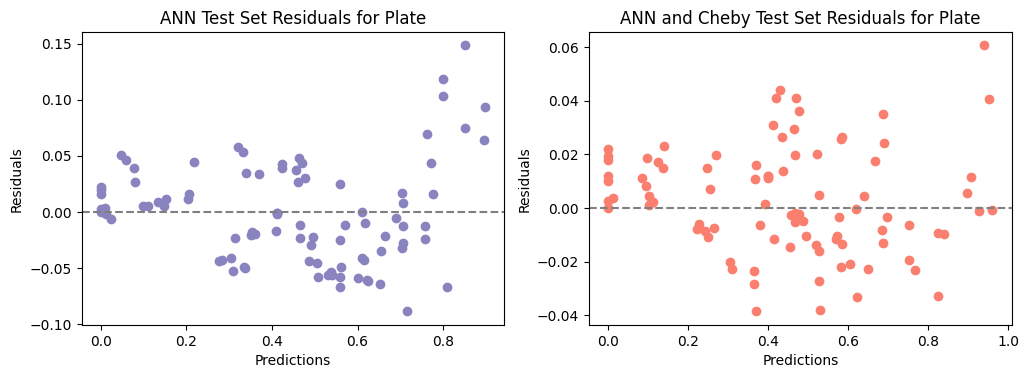

In [ ]:
# 紫色 '#BEB8DC'
# 橙色 '#FA7F6F'
fig = plt.figure(figsize=(12,3.8))
plt.subplot(121)
plt.title('ANN Test Set Residuals for Plate')
plate_ANN_residuals = y_test_plate.reshape(-1,1) - plate_y_test_predict
plt.scatter(plate_y_test_predict, plate_ANN_residuals, color = '#8983BF')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.axhline(y=0, color='gray', linestyle='--')
plt.subplot(122)
plt.title('ANN and Cheby Test Set Residuals for Plate')
plate_Cheby_residuals = y_test_plate.reshape(-1,1) - plate_y_test_predict_chevby
plt.scatter(plate_y_test_predict_chevby, plate_Cheby_residuals, color = '#FA7F6F')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.axhline(y=0, color='gray', linestyle='--')
plt.savefig('4.svg', format="svg")
plt.show()